In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy import stats
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
print(df)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

In [4]:
list(df)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [5]:
## remove NaNs
gdf = df.dropna(how='any', axis='rows', subset=['price'])
print(gdf)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

In [6]:
gdf.describe()

,Unnamed: 0,points,price
count,137235.000000,137235.000000,137235.000000
mean,75729.232018,87.787919,33.131482
std,43868.140942,3.221680,36.322536
min,0.000000,80.000000,4.000000
25%,37586.500000,86.000000,16.000000
50%,75725.000000,88.000000,24.000000
75%,114108.500000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [7]:
##parsing out price and point column and grouped them by country

country_pp = gdf.groupby('country').aggregate(np.mean)
rating = country_pp['points']
cost = country_pp['price']
print(country_pp)

                           Unnamed: 0     points      price
country                                                    
Albania                   4753.000000  88.000000  20.000000
Argentina                80839.745123  86.001074  20.794881
Australia                90696.535554  87.881488  31.258480
Austria                  72834.355618  89.190898  31.192106
Bosnia and Herzegovina   56937.750000  84.750000  12.750000
Brazil                   82272.800000  83.240000  19.920000
Bulgaria                 68737.701299  85.467532  11.545455
Canada                   61443.654639  88.221649  34.628866
Chile                    81981.092785  86.298127  19.344780
China                    74881.666667  82.000000  20.333333
Croatia                  67451.096386  86.493976  23.108434
Cyprus                   90992.935484  85.870968  15.483871
Czech Republic           73716.500000  85.833333  18.000000
England                  30064.750000  92.750000  47.500000
France                   69423.472371  8

In [8]:
##equation for line of best fit -- obtained from 
###"https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python"

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [9]:
# solution
a, b = best_fit(cost, rating)
##best fit line:
##y = 82.88 + 0.14x

best fit line:
y = 82.88 + 0.14x


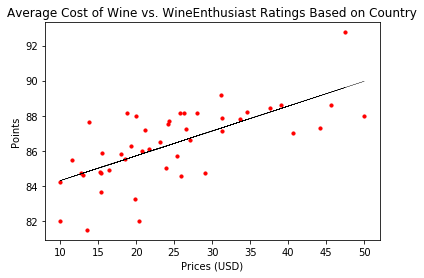

In [10]:
##Scatter plot of price vs points
plt.scatter(
    x=country_pp['price'],
    y=country_pp['points'],
    color='red',
    marker='o', s=10
)
plt.ylabel('Points')
plt.xlabel('Prices (USD)')
plt.title('Average Cost of Wine vs. WineEnthusiast Ratings Based on Country')

#line of best fit
yfit = [a + b * xi for xi in cost]
plt.plot(cost, yfit, color='black', linewidth='0.25')
plt.show()

####To see whether the cost of wine is correlated with its taste (assumed by a high WineEnthusiast rating)

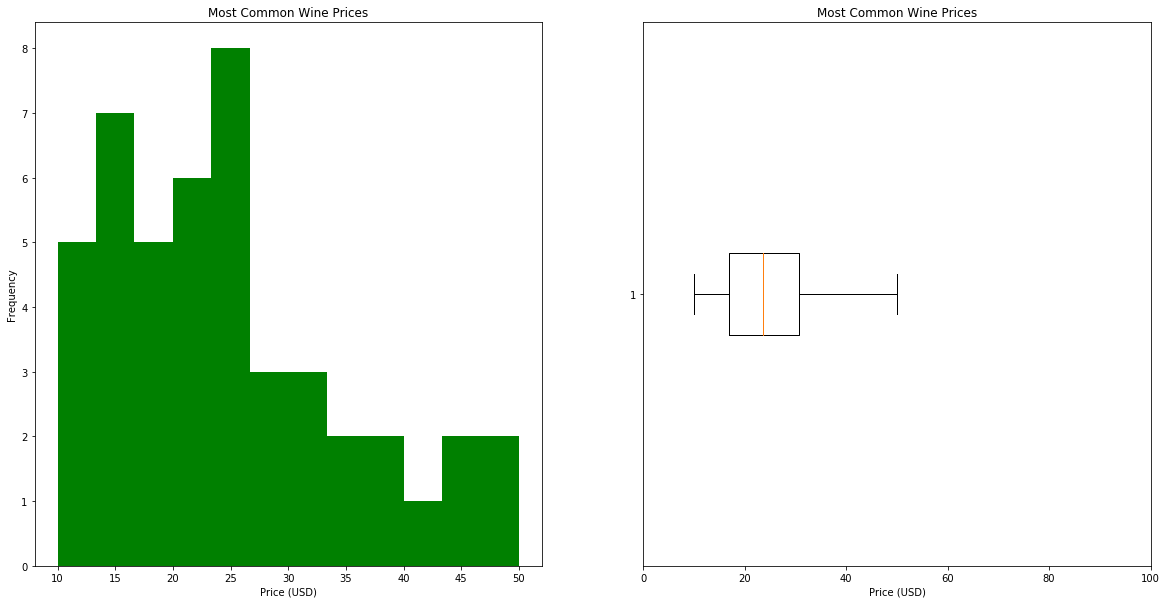

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.hist(cost, color='green', bins=12) 
plt.ylabel('Frequency')
plt.xlabel('Price (USD)')
plt.title('Most Common Wine Prices')

plt.subplot(1, 2, 2)
plt.boxplot(cost, vert=False)
plt.xlim(0,100)
plt.xlabel('Price (USD)')
plt.title('Most Common Wine Prices')

plt.show()


In [12]:
#review df
print(gdf)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

In [15]:
gdf.set_index('country', inplace=True)
us_cost=gdf.loc[['US'],['price']]
us_summ = us_cost['price']

plt.boxplot(us_summ)
plt.show()

KeyError: "['country']"

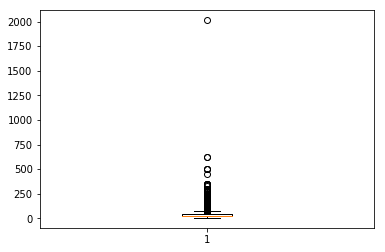

In [14]:
plt.boxplot(us_summ)
plt.show()